In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [187]:
pd.set_option('display.max_columns',None)

In [188]:
df=pd.read_csv('database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [189]:
df.shape

(908, 25)

In [190]:
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

The following is the list of features which can be dropped:
    1. country,country_long,name,gppd_idnr,latitude,longitude,owner,source,url,geolocation_source,wepp_id,
        generation_data_source - They have nominal values hence, these features won't helpful in predicting the desired label.
    2. other_fuel2,other_fuel3,estimated_generation_gwh - these features have null values.

In [191]:
df.drop(columns=['country', 'country_long', 'name', 'gppd_idnr','latitude', 'longitude', 'owner', 'source',
                 'url', 'geolocation_source', 'wepp_id', 'generation_data_source',
                 'other_fuel2', 'other_fuel3', 'estimated_generation_gwh'],axis=1,inplace=True )

In [192]:
df.shape

(908, 10)

In [193]:
df.head()

,capacity_mw,primary_fuel,other_fuel1,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,Solar,NaN,2011.0,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,Gas,NaN,2004.0,2018.0,631.777928,617.789264,843.747,886.004428,663.774500
4,1800.0,Coal,Oil,2015.0,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


In [194]:
df.isna().sum()

capacity_mw                0
primary_fuel               0
other_fuel1              709
commissioning_year       380
year_of_capacity_data    388
generation_gwh_2013      524
generation_gwh_2014      507
generation_gwh_2015      483
generation_gwh_2016      471
generation_gwh_2017      465
dtype: int64

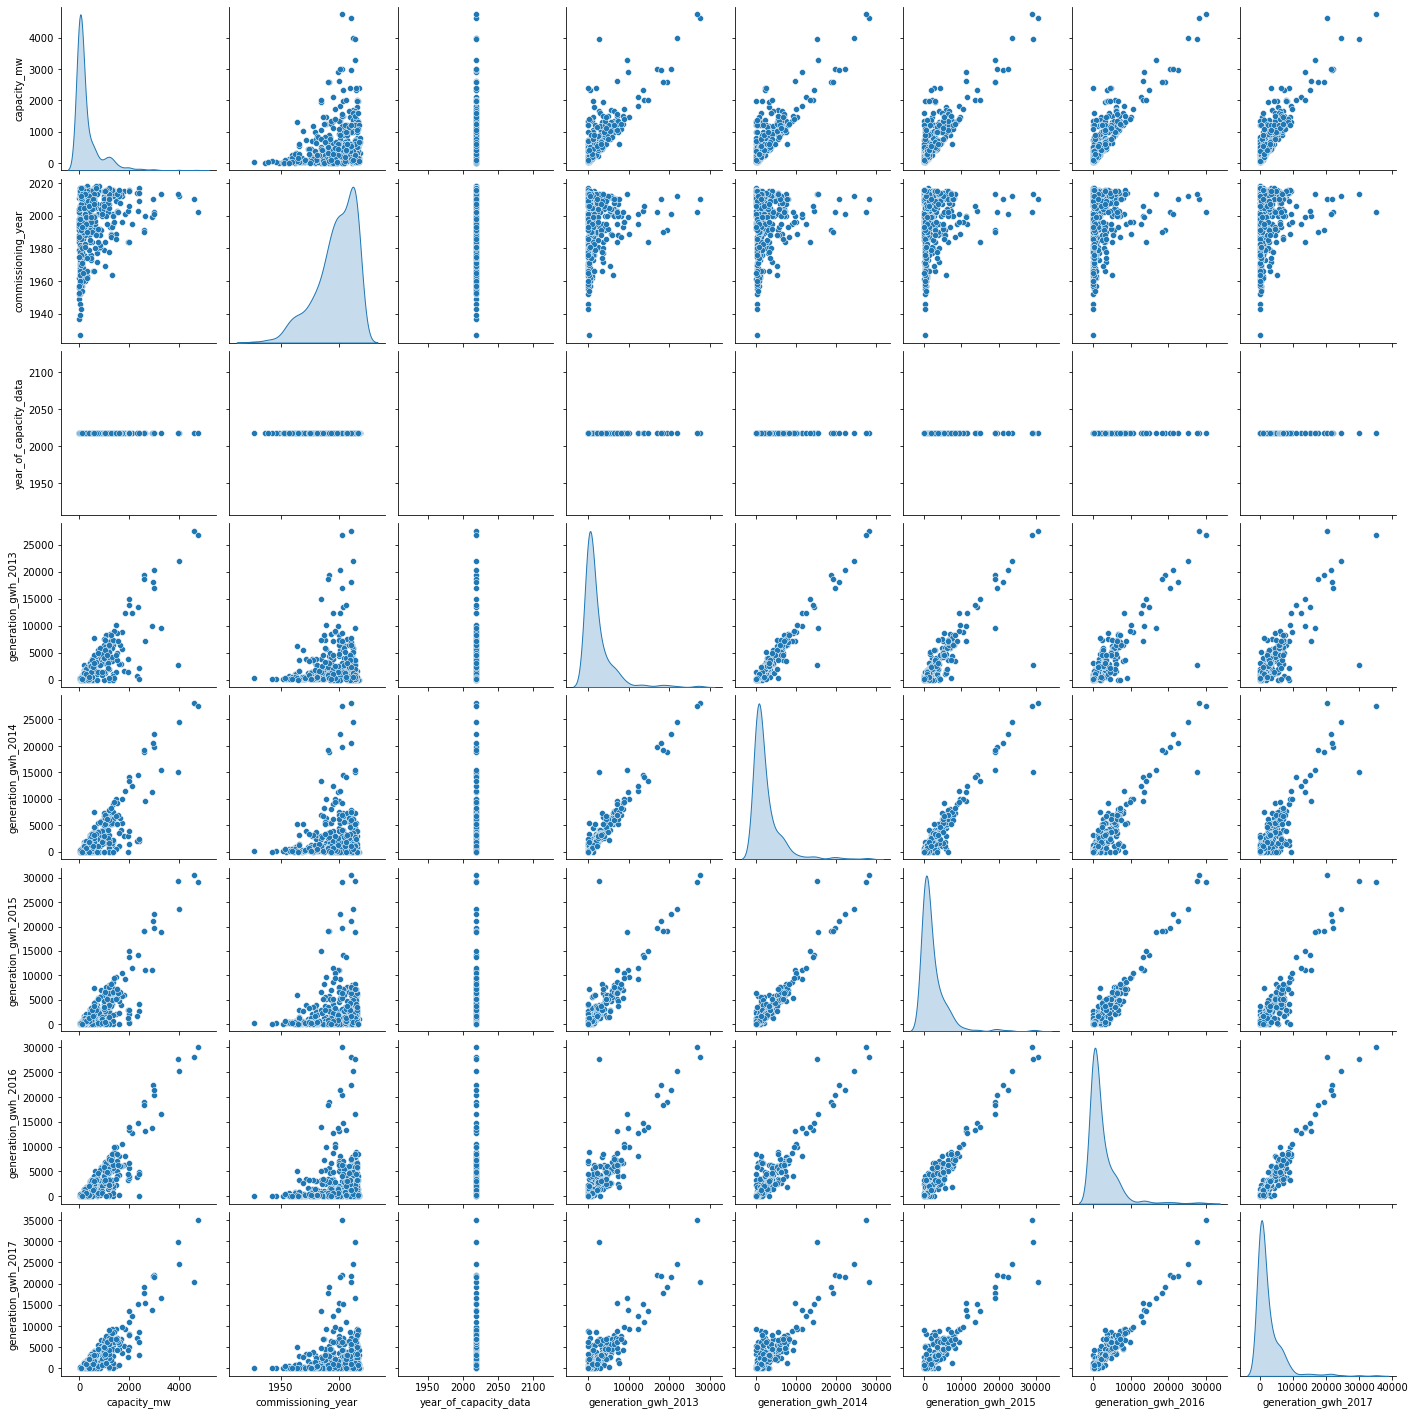

In [195]:
sns.pairplot(df, diag_kind='kde')

In [196]:
numeric_col=list(df.select_dtypes(include='number'))
numeric_col

['capacity_mw',
 'commissioning_year',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017']

In [197]:
cat_col=list(df.select_dtypes(include='object'))
cat_col

['primary_fuel', 'other_fuel1']

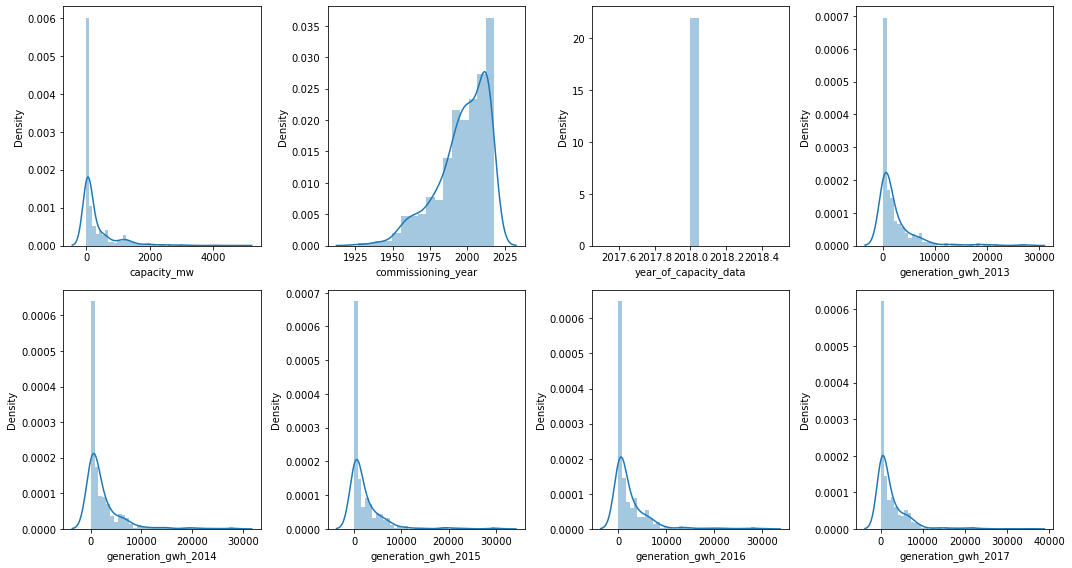

In [198]:
plt.figure(figsize=(15,8))
plotnumber=1

for col in numeric_col:
    if plotnumber<=8:
        plt.subplot(2,4,plotnumber)
        sns.distplot(df[col])
        plotnumber+=1
plt.tight_layout()

from the distribution plot it is clear that there are some outliers in the dataset.

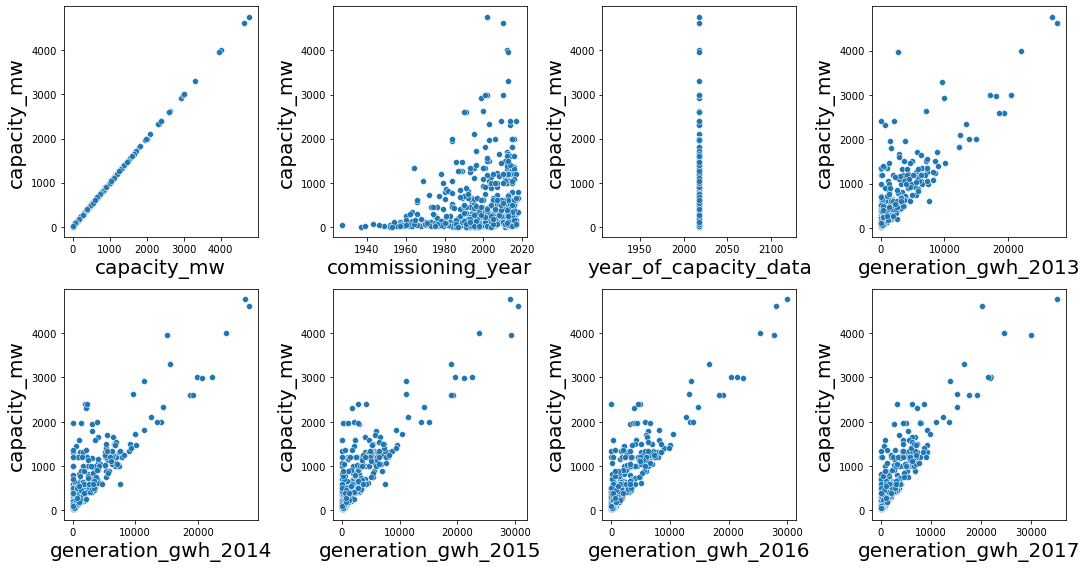

In [199]:
plt.figure(figsize=(15,8))
plotnumber=1

for col in numeric_col:
    if plotnumber<=8:
        plt.subplot(2,4,plotnumber)
        sns.scatterplot(x=df[col],y=df['capacity_mw'])
        plt.xlabel(col,fontsize=20)
        plt.ylabel('capacity_mw',fontsize=20)
        plotnumber+=1
plt.tight_layout()        

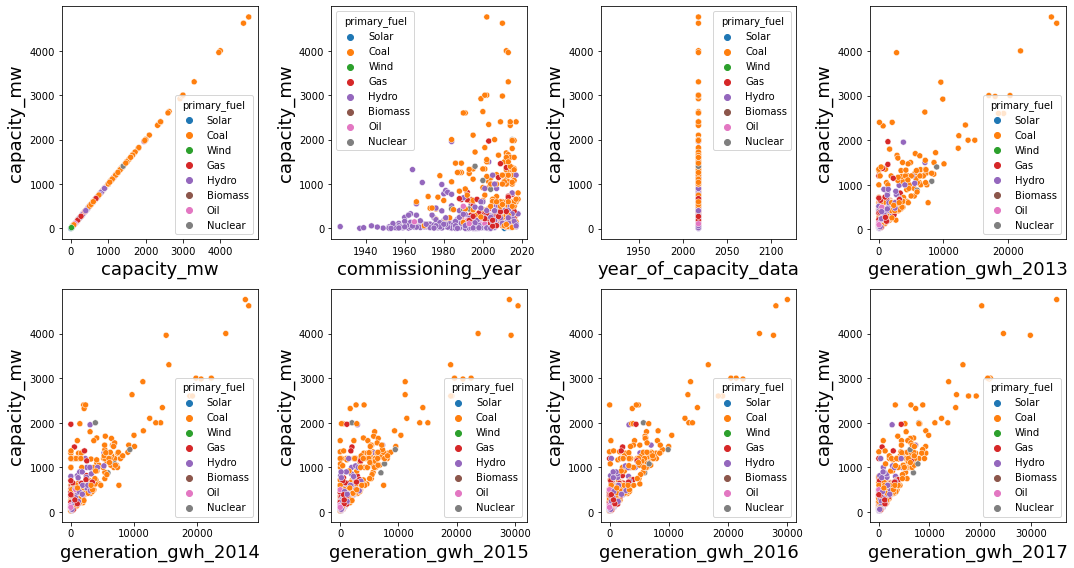

In [200]:
plt.figure(figsize=(15,8))
plotnumber=1

for col in numeric_col:
    if plotnumber<=8:
        plt.subplot(2,4,plotnumber)
        sns.scatterplot(x=df[col],y=df['capacity_mw'],hue=df['primary_fuel'])
        plt.xlabel(col,fontsize=18)
        plt.ylabel('capacity_mw',fontsize=18)
        plotnumber+=1
plt.tight_layout()

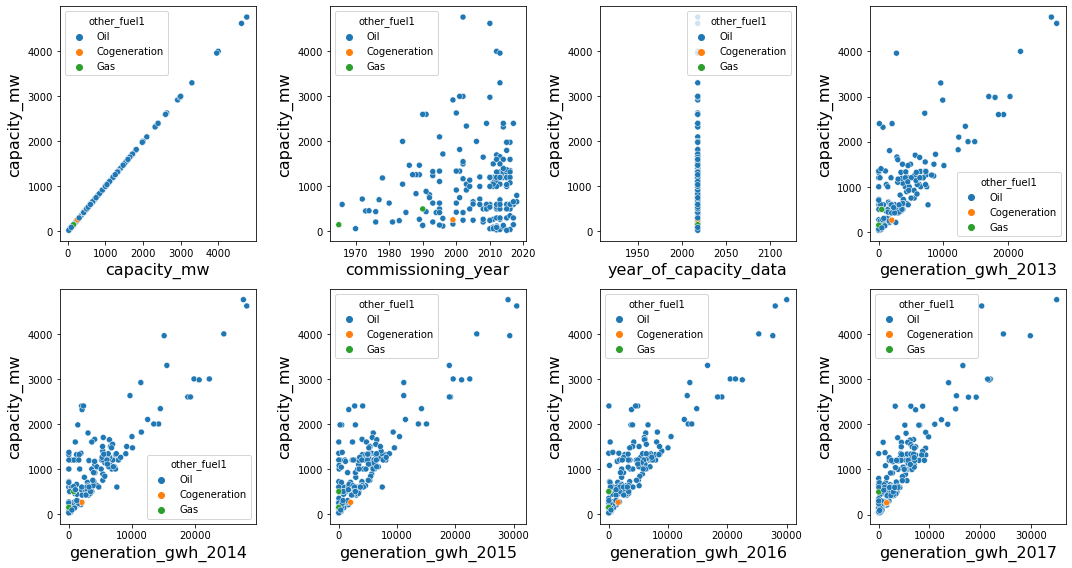

In [201]:
plt.figure(figsize=(15,8))
plotnumber=1

for col in numeric_col:
    if plotnumber<=8:
        plt.subplot(2,4,plotnumber)
        sns.scatterplot(x=df[col],y=df['capacity_mw'],hue=df['other_fuel1'])
        plt.xlabel(col,fontsize=16)
        plt.ylabel('capacity_mw',fontsize=16)
        plotnumber+=1
plt.tight_layout()

In [202]:
df['other_fuel1'].value_counts()

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

If there are NaN in other_fuel1 feature it means that there is not other fuel which runs tha plant. Hence, we won't impute values for this feature. We will just replace NaN with Nil.

In [203]:
df['other_fuel1'].fillna('Nil',inplace=True)

In [204]:
df['other_fuel1'].value_counts()

Nil             709
Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

There are two features 'commissioning_year' and 'year_of_capacity_data'. We will calculate the age of plant from these features after imputation of values in 'year_of_capacity_data'

In [205]:
df['year_of_capacity_data'].isna().sum()

388

In [206]:
df['year_of_capacity_data'].fillna(2018,inplace=True)

In [207]:
df['year_of_capacity_data'].isna().sum()

0

In [208]:
df['plant_age']=df['year_of_capacity_data']-df['commissioning_year']

In [209]:
df['plant_age'].isna().sum()

380

In [210]:
df.drop(columns=['year_of_capacity_data','commissioning_year'],inplace=True)

In [211]:
df['plant_age'].fillna(0,inplace=True)

In [212]:
df['plant_age'].isna().sum()

0

In [213]:
df.isna().sum()

capacity_mw              0
primary_fuel             0
other_fuel1              0
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
plant_age                0
dtype: int64

there are lots of data still missing from the dataset. there is no other option but to drop these values to build an accurate model

In [214]:
df.dropna(inplace=True)

In [215]:
df.isna().sum()

capacity_mw            0
primary_fuel           0
other_fuel1            0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
plant_age              0
dtype: int64

In [216]:
df.reset_index(drop=True)

,capacity_mw,primary_fuel,other_fuel1,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,plant_age
0,135.0,Gas,Nil,631.777928,617.789264,843.74700,886.004428,663.774500,14.0
1,1800.0,Coal,Oil,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736,3.0
2,250.0,Coal,Oil,821.798000,1153.421000,1208.85200,1175.765000,1147.913000,13.0
3,60.0,Hydro,Nil,147.568450,157.558250,152.19520,61.421350,89.629600,48.0
4,192.0,Hydro,Nil,696.738800,674.391100,721.33520,675.724400,679.594950,8.0
...,...,...,...,...,...,...,...,...,...
373,400.0,Hydro,Nil,435.710500,1806.860300,1204.59675,2031.839750,2150.095500,12.0
374,1470.0,Coal,Oil,4542.028000,6753.870000,5161.53800,3539.630000,7018.217000,32.0
375,540.0,Coal,Oil,2311.320000,1045.820000,1651.15890,1229.480000,999.170000,8.0
376,62.4,Hydro,Nil,203.975000,184.453100,183.00000,204.253600,175.866250,27.0


In [217]:
df['primary_fuel'].value_counts()

Hydro      164
Coal       150
Gas         50
Oil          8
Nuclear      6
Name: primary_fuel, dtype: int64

In [218]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

df1=lab_enc.fit_transform(df['primary_fuel'])
pd.Series(df1)

df['primary_fuel']=df1

In [219]:
df1=lab_enc.fit_transform(df['other_fuel1'])
pd.Series(df1)
df['other_fuel1']=df1

In [220]:
df.head()

,capacity_mw,primary_fuel,other_fuel1,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,plant_age
3,135.0,1,2,631.777928,617.789264,843.7470,886.004428,663.774500,14.0
4,1800.0,0,3,1668.290000,3035.550000,5916.3700,6243.000000,5385.579736,3.0
5,250.0,0,3,821.798000,1153.421000,1208.8520,1175.765000,1147.913000,13.0
6,60.0,2,2,147.568450,157.558250,152.1952,61.421350,89.629600,48.0
7,192.0,2,2,696.738800,674.391100,721.3352,675.724400,679.594950,8.0


In [221]:
df['other_fuel1'].value_counts()

2    220
3    156
1      1
0      1
Name: other_fuel1, dtype: int64

We have cleaned the data and imputed the missing values. Let us check for any outliers in out dataset

In [222]:
feature=['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']

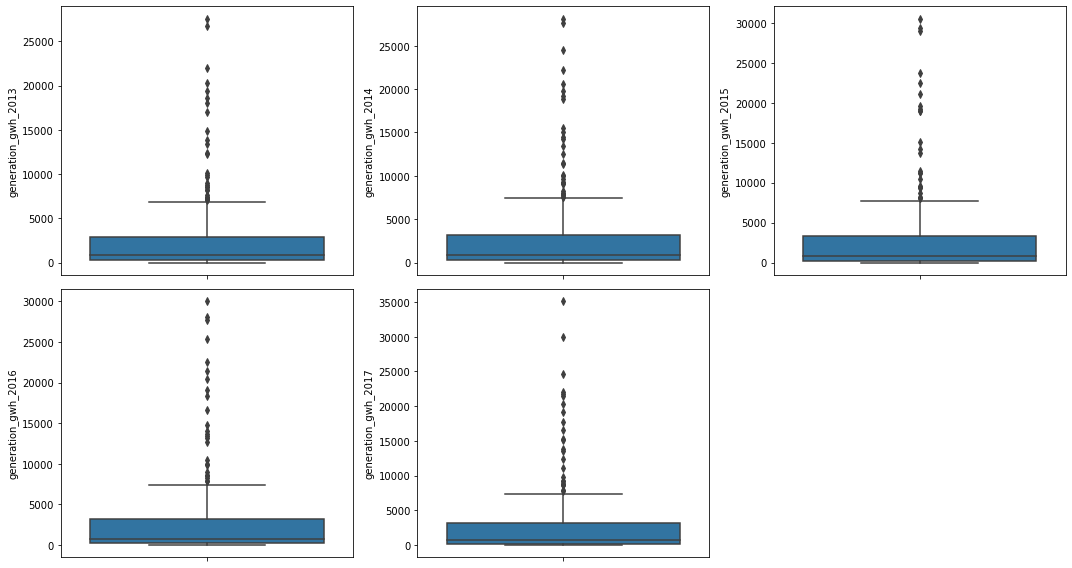

In [223]:
plt.figure(figsize=(15,8))
plotnumber=1

for col in feature:
    if plotnumber<=5:
        plt.subplot(2,3,plotnumber)
        sns.boxplot(y=df[col])
        plotnumber+=1
plt.tight_layout()

In [224]:
from scipy import stats

for col in feature:
    z=np.abs(stats.zscore(df[col]))
    index=np.where(z>3)[0]
    df=df.drop(df.index[index])
    
df.shape

(352, 9)

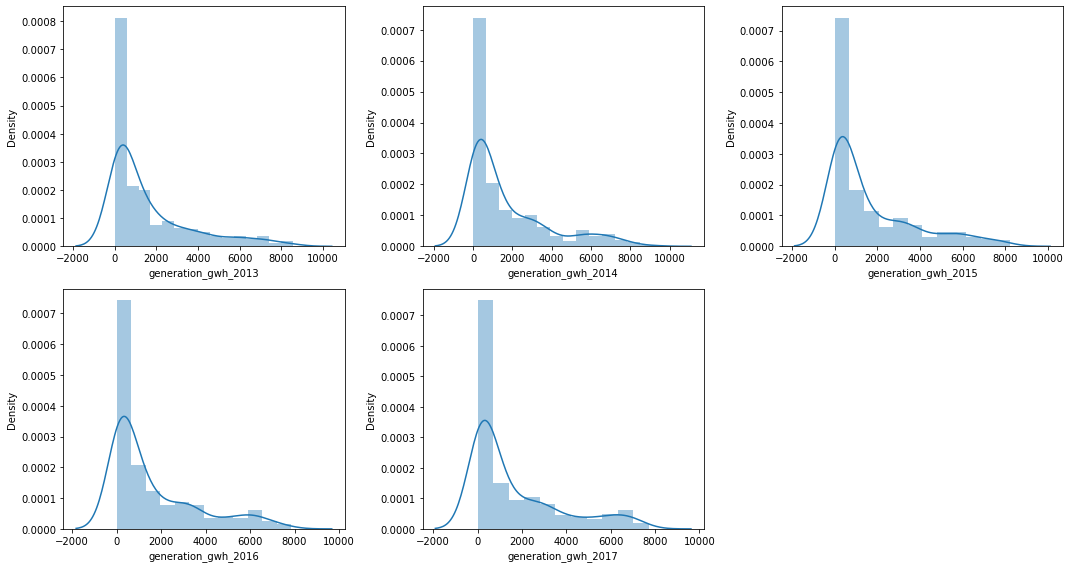

In [225]:
plt.figure(figsize=(15,8))
plotnumber=1

for col in feature:
    if plotnumber<=5:
        plt.subplot(2,3,plotnumber)
        sns.distplot(df[col])
        plotnumber+=1
plt.tight_layout()

The data looks little bit normally distributed. There are very less number of features. Hence, we don't need to perform feature selection or check for multicolinearity. Lets split the dataset, scale it and fit in model

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x=df.drop(columns=['capacity_mw', 'primary_fuel'])
y=df[['capacity_mw', 'primary_fuel']]

In [228]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [229]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [230]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=123)

In [239]:
models = [['LinearRegression : ', LinearRegression()],
          ['Lasso : ', Lasso()],
          ['Ridge : ', Ridge()],
          ['KNeighborsRegressor : ', KNeighborsRegressor()],
          ['DecisionTreeRegressor : ', DecisionTreeRegressor()],
          ['RandomForestRegressor : ', RandomForestRegressor()]\
         ]

In [240]:
for name, model in models:
    model=model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

LinearRegression :  233.75052301909494
Lasso :  231.60777767535146
Ridge :  233.28713755157708
KNeighborsRegressor :  228.8169115870273
DecisionTreeRegressor :  255.2079566575872
RandomForestRegressor :  213.53394280482283


In [243]:
algorithms = {
    'DecisionTreeRegressor' : {
        'model' : DecisionTreeRegressor(),
        'param' : {
            'max_depth' : [3, 5, 7, 9, 11, 13, 15,20,25,50],
            'min_samples_leaf' : [3, 5, 7,13,15,20,50,100],
            'min_samples_split' : [3, 5, 7,13,15,20,50,100],
        }
    },
    'RandomForestRegressor' : {
        'model' : RandomForestRegressor(),
        'param' : {
            'n_estimators' : [10,20,50,100, 300, 500, 700, 1000, 2100],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15,20,50],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8,10,15,20]
        }
    },
}

In [244]:
score = []

for name, mp in algorithms.items() :
    rs = RandomizedSearchCV(estimator = mp['model'], param_distributions = mp['param'], cv = 10, n_jobs=-1, verbose=3)
    rs.fit(X_train, y_train)
    score.append({
        'model': name,
        'score' : rs.best_score_,
        'params' : rs.best_params_
    })

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   53.2s finished


In [245]:
performance = pd.DataFrame(score, columns=['model', 'score', 'params'])
performance

,model,score,params
0,DecisionTreeRegressor,0.485541,"{'min_samples_split': 5, 'min_samples_leaf': 3..."
1,RandomForestRegressor,0.639607,"{'n_estimators': 700, 'min_samples_split': 2, ..."


In [246]:
performance['params'][1]

{'n_estimators': 700,
 'min_samples_split': 2,
 'max_features': 'log2',
 'max_depth': 9}

In [247]:
final_model = RandomForestRegressor(n_estimators=700, min_samples_split=2, max_features='log2', max_depth=9)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
print('RMSE of Random Forest Regressor : {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

RMSE of Random Forest Regressor : 214.32257487004387


In [248]:
final_model.score(X_train, y_train), final_model.score(X_test, y_test)

(0.8867889098015163, 0.5830987210662548)

In [249]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 90.10869419038218
RMSE: 214.32257487004387


In [250]:
import pickle
with open ('GlobalPowerPlantPrediction.sav','wb') as f:
    pickle.dump(final_model,f)